In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette('Paired')

In [2]:
def assign_regions(df, list_of_lists):
    for index in df.index:
        for region in list_of_lists:
            for country in region:
                if df.at[index,'Country'] == country:
                    df.at[index,'Region'] = region[-1]
    return(df)
    
def graph_regions(df):
    g = sns.catplot(data = df.mask(df['Sex'] == 'Both sexes').dropna(), kind = 'swarm', 
                    x = 'Sex', y = 'BMI',
                    hue = 'Year', ci = None, legend = None, palette = 'Blues')
    h = sns.catplot(data = df.mask(df['Sex'] == 'Both sexes').dropna(), kind = 'swarm',
                    x = 'Sex', y = 'BMI',
                    hue = 'Year', col = 'Region', ci = None, legend = None, palette = 'Reds')



In [3]:
data_clean = pd.read_csv('data_clean.csv')

#data_clean['Continent'] = data_clean['Region']
asia = ['South Asia', 'Southeast Asia', 'East Asia', 'Central Asia']
europe = ['Balkans', 'Southern Europe', 'Western Europe', 'Northern Europe']
africa = ['North Africa', 'West Africa', 'East Africa', 'Central Africa']
north_america = ['Central America', 'North America']
south_america = ['South America']
oceania = ['Oceania']

#for index in data_clean.index:
#    if data_clean.at[index,'Region'] in asia:
#        data_clean.at[index,'Continent'] = 'Asia'
#    elif data_clean.at[index,'Region'] in europe:
#        data_clean.at[index,'Continent'] = 'Europe'
#    elif data_clean.at[index,'Region'] in africa:
#        data_clean.at[index,'Continent'] = 'Africa'
#    elif data_clean.at[index,'Region'] in north_america:
#        data_clean.at[index,'Continent'] = 'North America'
#    elif data_clean.at[index,'Region'] in south_america:
#        data_clean.at[index,'Continent'] = 'South America'
#    else:
#        data_clean.at[index,'Continent'] = 'Oceania'

#del index
multi_index = pd.MultiIndex.from_frame(data_clean[['Continent','Country','Region']])
data_clean = data_clean.set_index(multi_index)

data_clean = data_clean.drop(columns = ['Continent', 'Region'])
print(data_clean.head())

                                      Country         Sex  Year  \
Continent Country     Region                                      
Asia      Afghanistan South Asia  Afghanistan  Both sexes  1975   
                      South Asia  Afghanistan        Male  1975   
                      South Asia  Afghanistan      Female  1975   
                      South Asia  Afghanistan  Both sexes  1976   
                      South Asia  Afghanistan        Male  1976   

                                    Obesity (%)  BMI  
Continent Country     Region                          
Asia      Afghanistan South Asia  0.5 [0.2-1.1]  0.5  
                      South Asia  0.2 [0.0-0.6]  0.2  
                      South Asia  0.8 [0.2-2.0]  0.8  
                      South Asia  0.5 [0.2-1.1]  0.5  
                      South Asia  0.2 [0.0-0.7]  0.2  


# Asia

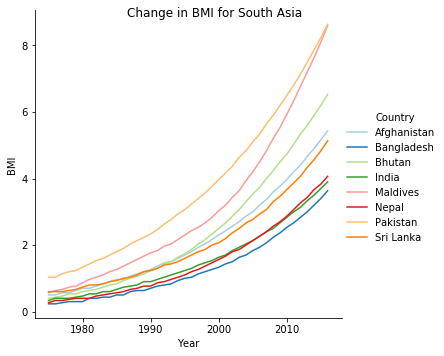

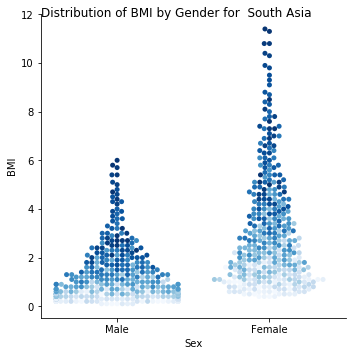

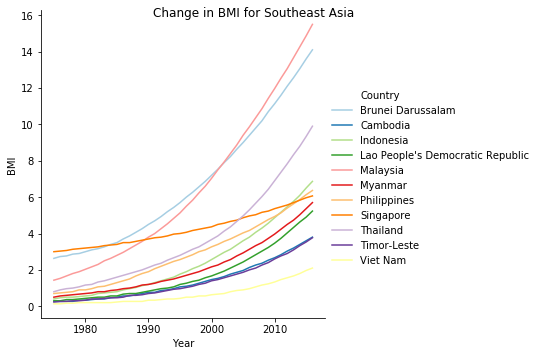

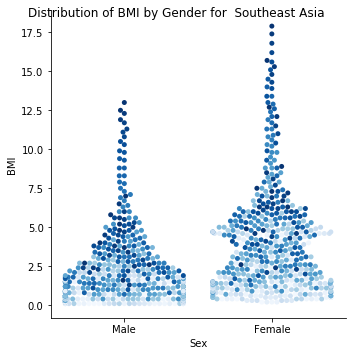

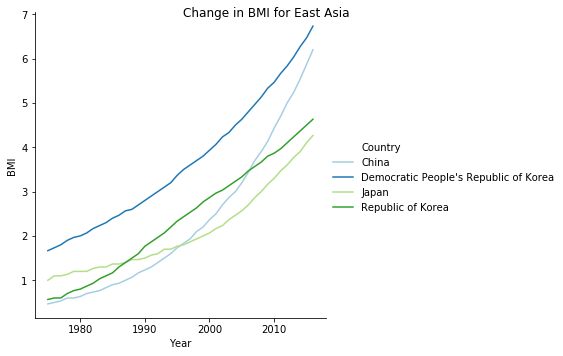

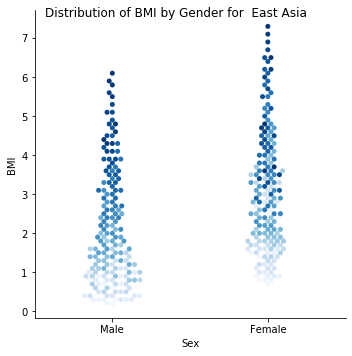

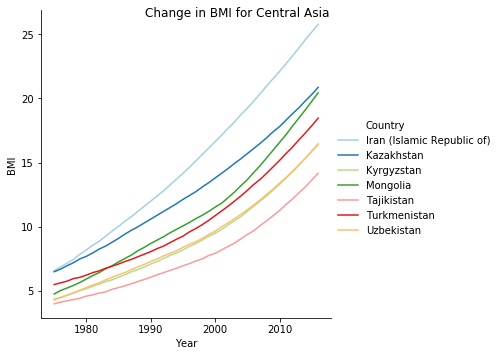

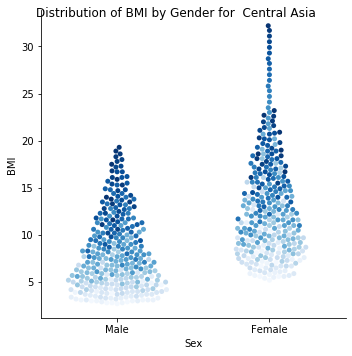

In [4]:
for region in asia:
    df_region = data_clean.xs(['Asia', str(region)], level = [0,2])
    g = sns.relplot(data = df_region, kind = 'line',
               x = 'Year', y = 'BMI', hue = 'Country', ci = None)
    g.fig.suptitle('Change in BMI for '+str(region))
    
    df_region = df_region.mask(df_region['Sex'] == 'Both sexes').dropna()
    h = sns.catplot(data = df_region, kind = 'swarm',
                   x = 'Sex', y = 'BMI', hue = 'Year', palette = 'Blues', legend = None, order = ['Male', 'Female'])
    h.fig.suptitle('Distribution of BMI by Gender for  '+str(region))

## Middle East
The middle east is a relatively large region, and the data is a little hard to deciper, so below I split it up into sub-regions

The Middle East region is split up into the following subregions


Arabian Peninsula: ['Bahrain', 'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates', 'Yemen']
Levant: ['Israel', 'Lebanon', 'Syrian Arab Republic', 'Turkey']
Middle East: ['Iraq', 'Jordan', 'Kuwait']


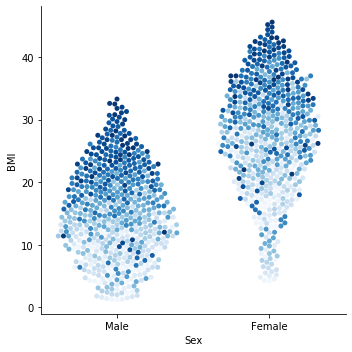

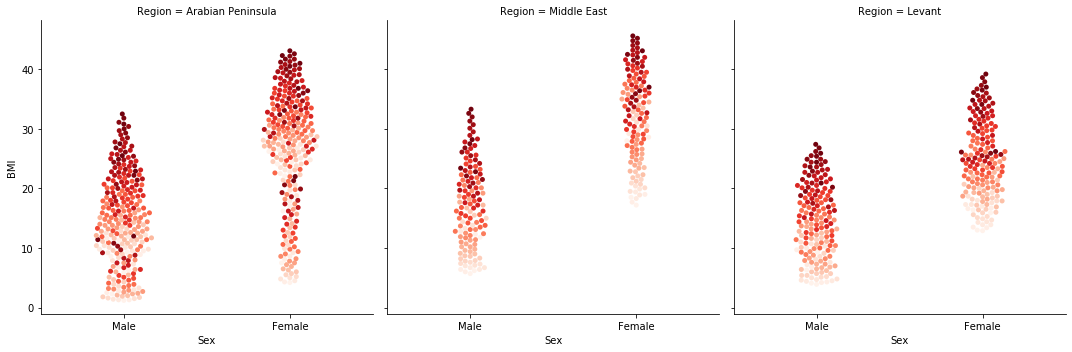

In [5]:
middle_east = data_clean.xs('Middle East', level = 2).drop('Country',axis = 1).reset_index()
arabian_peninsula = ['Bahrain', 'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates', 'Yemen', 'Arabian Peninsula']
levant = ['Israel', 'Lebanon', 'Syrian Arab Republic', 'Turkey', 'Levant']
mid_east = ['Iraq', 'Jordan', 'Kuwait', 'Middle East']
list_of_lists = [arabian_peninsula, levant, mid_east]

middle_east = assign_regions(middle_east, list_of_lists)
graph_regions(middle_east)

print('The Middle East region is split up into the following subregions\n\n')
for region in list_of_lists:
    print(region[-1]+': '+str(region[0:-1]))
del middle_east

# Europe

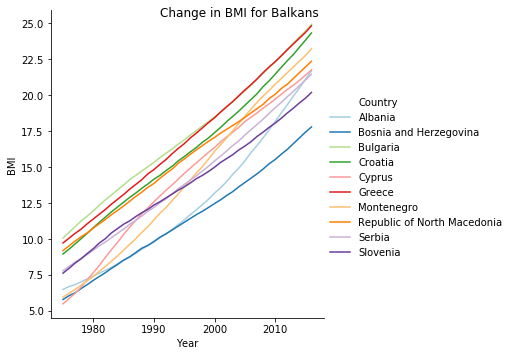

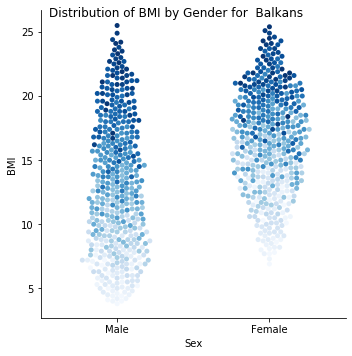

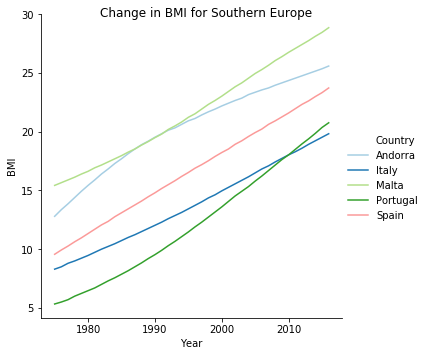

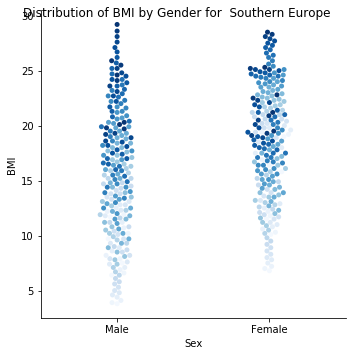

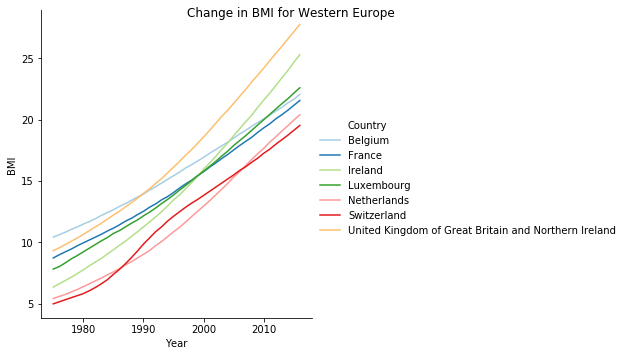

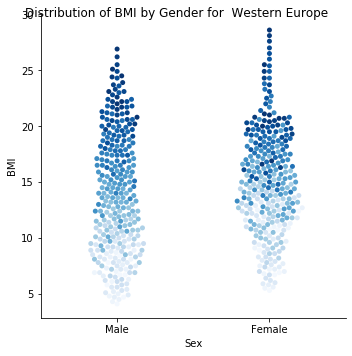

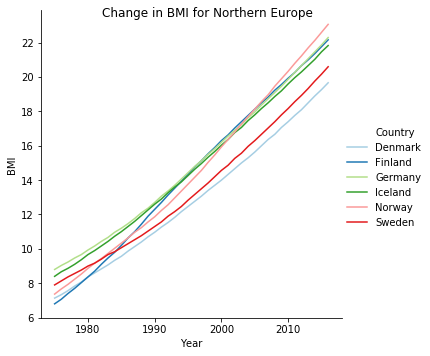

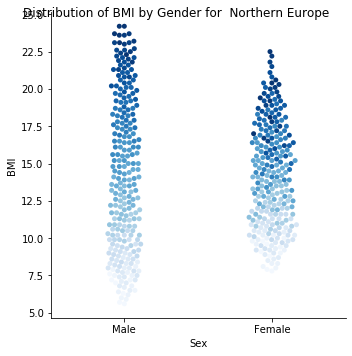

In [6]:
data_clean = data_clean.mask(data_clean['Country'] == 'Monaco').mask(data_clean['Country'] == 'San Marino').dropna()
for region in europe:
    df_region = data_clean.xs(['Europe', str(region)], level = [0,2])
    g = sns.relplot(data = df_region, kind = 'line',
               x = 'Year', y = 'BMI', hue = 'Country', ci = None)
    g.fig.suptitle('Change in BMI for '+str(region))
    
    df_region = df_region.mask(df_region['Sex'] == 'Both sexes').dropna()
    h = sns.catplot(data = df_region, kind = 'swarm',
                   x = 'Sex', y = 'BMI', hue = 'Year', palette = 'Blues', legend = None, order = ['Male', 'Female'])
    h.fig.suptitle('Distribution of BMI by Gender for  '+str(region))

## Eastern Europe

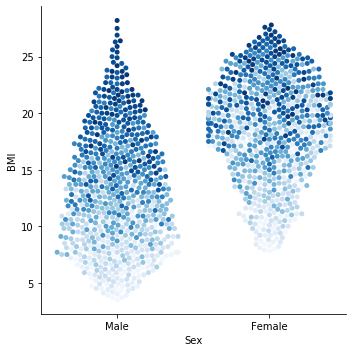

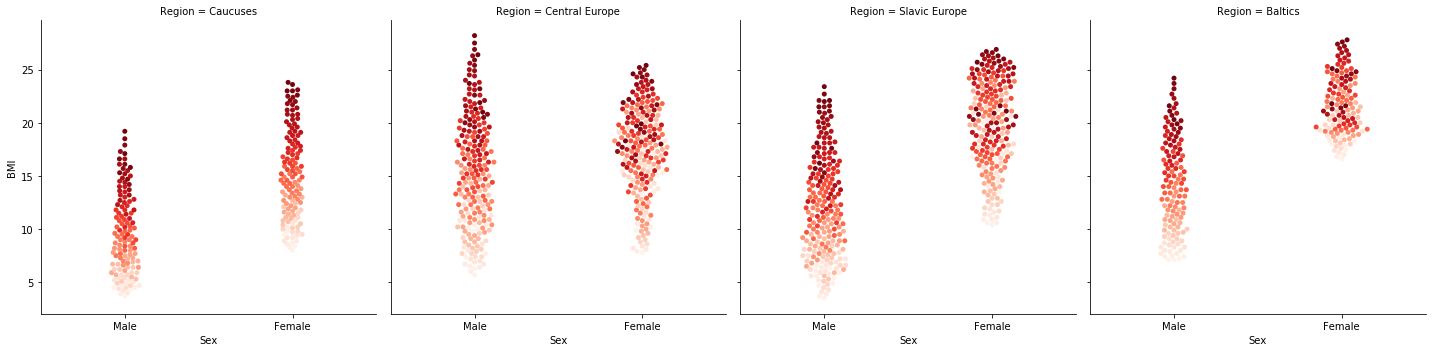

In [16]:
eastern_europe = data_clean.xs('Eastern Europe', level = 2).drop('Country', axis = 1).reset_index()
central_europe = ['Austria', 'Czechia', 'Hungary', 'Poland', 'Slovakia', 'Central Europe']
baltics = ['Estonia', 'Latvia', 'Lithuania', 'Baltics']
caucuses = ['Armenia', 'Azerbaijan', 'Georgia', 'Caucuses']
slavic_europe = ['Belarus', 'Republic of Moldova', 'Romania', 'Russian Federation', 'Ukraine', 'Slavic Europe']
list_of_lists = [eastern_europe, central_europe, baltics, caucuses, slavic_europe]

eastern_europe = assign_regions(eastern_europe, list_of_lists)
graph_regions(eastern_europe)
del eastern_europe

# Africa

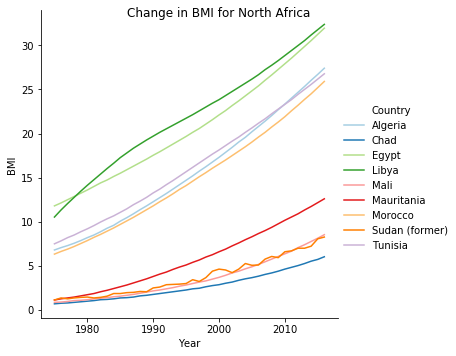

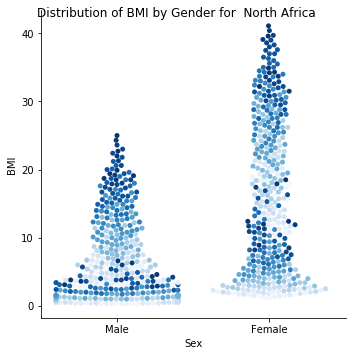

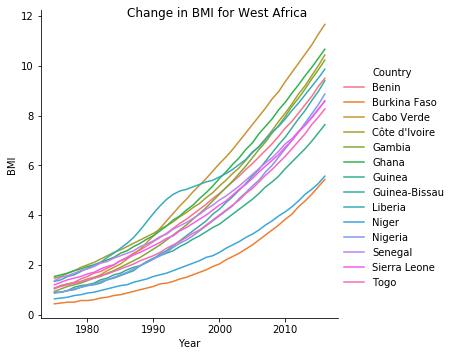

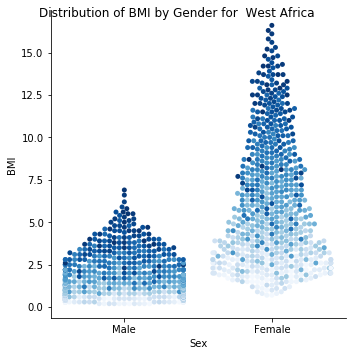

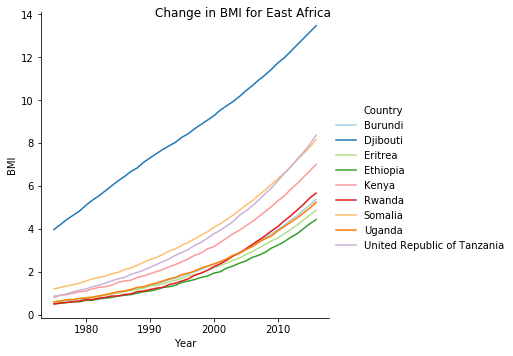

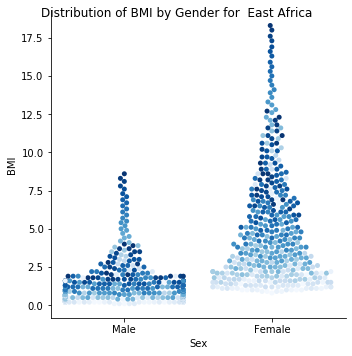

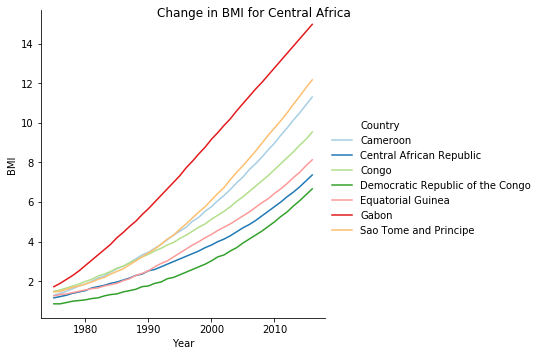

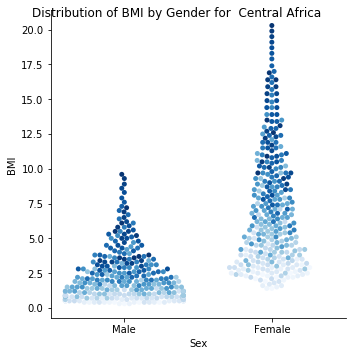

In [8]:
data_clean = data_clean.mask(data_clean['Country'] == 'Sudan').mask(data_clean['Country'] == 'South Sudan').dropna()
for region in africa:
    df_region = data_clean.xs(['Africa', str(region)], level = [0,2])
    g = sns.relplot(data = df_region, kind = 'line',
               x = 'Year', y = 'BMI', hue = 'Country', ci = None)
    g.fig.suptitle('Change in BMI for '+str(region))
    
    df_region = df_region.mask(df_region['Sex'] == 'Both sexes').dropna()
    h = sns.catplot(data = df_region, kind = 'swarm',
                   x = 'Sex', y = 'BMI', hue = 'Year', palette = 'Blues', legend = None, order = ['Male', 'Female'])
    h.fig.suptitle('Distribution of BMI by Gender for  '+str(region))

## Southern Africa

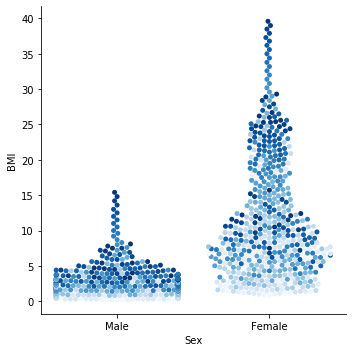

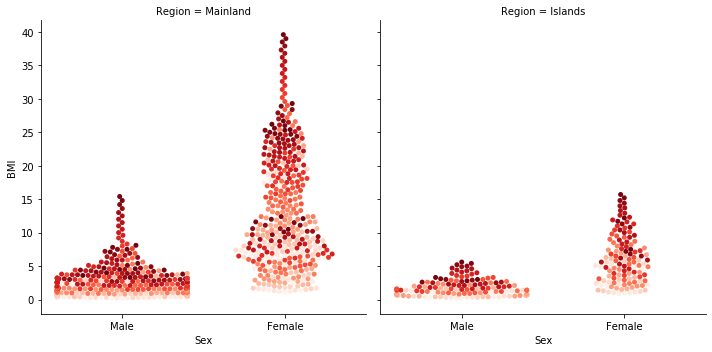

In [9]:
southern_africa = data_clean.xs('Southern Africa', level = 2).drop('Country', axis = 1).reset_index()
mainland = ['Angola', 'Botswana', 'Eswatini', 'Lesotho', 'Maliwi', 'Mozambique', 'Namibia', 'South Africa', 'Zambia', 'Zimbabwe', 'Mainland']
islands = ['Comoros', 'Madagascar', 'Mauritius', 'Islands']
list_of_lists = [mainland, islands]
southern_africa = assign_regions(southern_africa, list_of_lists)
graph_regions(southern_africa)
del southern_africa

# North America

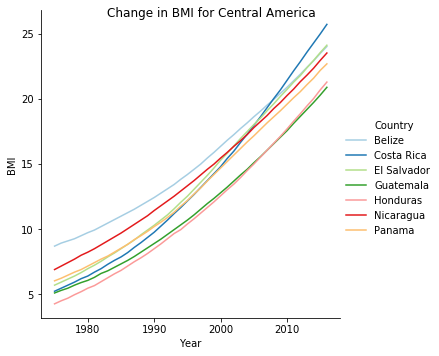

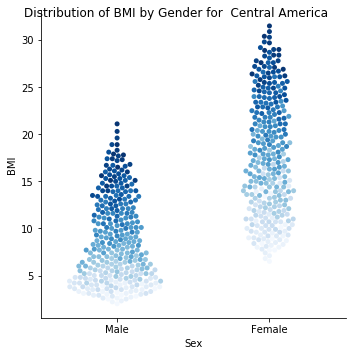

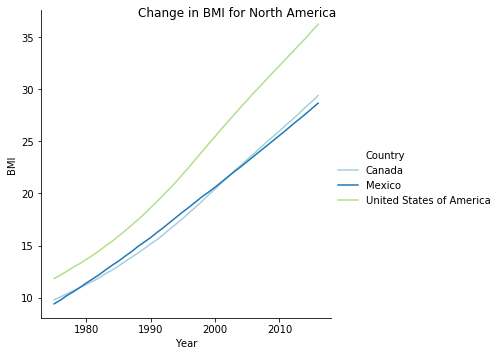

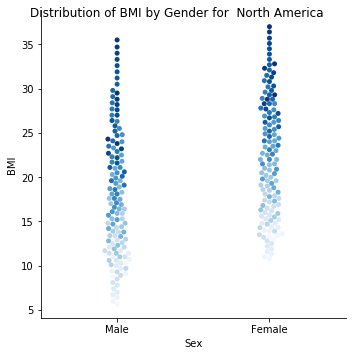

In [10]:
for region in north_america:
    df_region = data_clean.xs(['North America', str(region)], level = [0,2])
    g = sns.relplot(data = df_region, kind = 'line',
               x = 'Year', y = 'BMI', hue = 'Country', ci = None)
    g.fig.suptitle('Change in BMI for '+str(region))
    
    df_region = df_region.mask(df_region['Sex'] == 'Both sexes').dropna()
    h = sns.catplot(data = df_region, kind = 'swarm',
                   x = 'Sex', y = 'BMI', hue = 'Year', palette = 'Blues', legend = None, order = ['Male', 'Female'])
    h.fig.suptitle('Distribution of BMI by Gender for  '+str(region))

## Caribbean

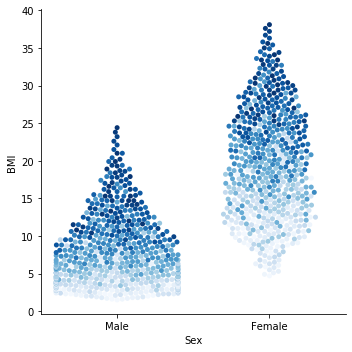

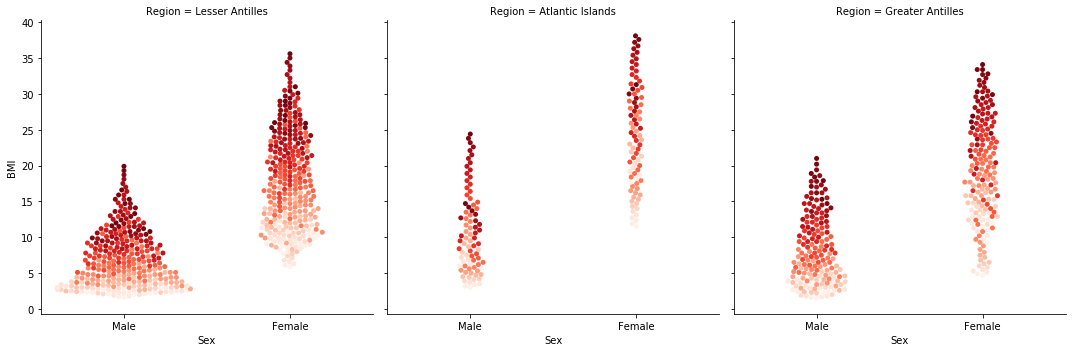

In [11]:
caribbean = data_clean.xs('Caribbean', level = 2).drop('Country', axis = 1).reset_index()
greater_antilles = ['Cuba', 'Dominican Republic', 'Haiti', 'Jamaica', 'Greater Antilles']
lesser_antilles = ['Antigua and Barbuda', 'Dominica', 'Grenada', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'Lesser Antilles']
atlantic_islands = ['Bahamas', 'Barbados', 'Atlantic Islands']
list_of_lists = [greater_antilles, lesser_antilles, atlantic_islands]

caribbean = assign_regions(caribbean, list_of_lists)
graph_regions(caribbean)
del caribbean

# South America

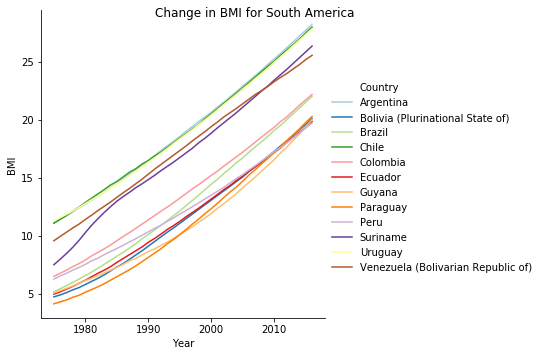

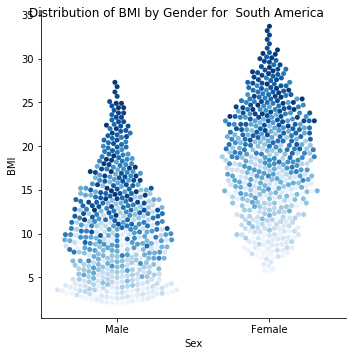

In [12]:
for region in south_america:
    df_region = data_clean.xs(['South America', str(region)], level = [0,2])
    g = sns.relplot(data = df_region, kind = 'line',
               x = 'Year', y = 'BMI', hue = 'Country', ci = None)
    g.fig.suptitle('Change in BMI for '+str(region))
    
    df_region = df_region.mask(df_region['Sex'] == 'Both sexes').dropna()
    h = sns.catplot(data = df_region, kind = 'swarm',
                   x = 'Sex', y = 'BMI', hue = 'Year', palette = 'Blues', legend = None, order = ['Male', 'Female'])
    h.fig.suptitle('Distribution of BMI by Gender for  '+str(region))

# Oceania

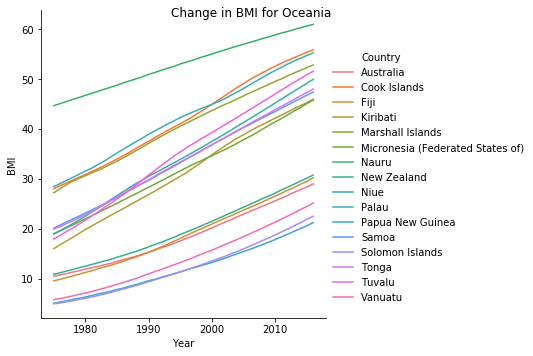

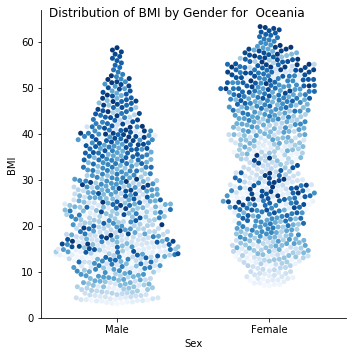

In [13]:
for region in oceania:
    df_region = data_clean.xs(['Oceania', str(region)], level = [0,2])
    g = sns.relplot(data = df_region, kind = 'line',
               x = 'Year', y = 'BMI', hue = 'Country', ci = None)
    g.fig.suptitle('Change in BMI for '+str(region))
    
    df_region = df_region.mask(df_region['Sex'] == 'Both sexes').dropna()
    h = sns.catplot(data = df_region, kind = 'swarm',
                   x = 'Sex', y = 'BMI', hue = 'Year', palette = 'Blues', legend = None, order = ['Male', 'Female'])
    h.fig.suptitle('Distribution of BMI by Gender for  '+str(region))